User segmentation E-commerce Customers based on RFM variables

In [ ]:
#Importing libraries that will be needed in the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn  as sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install feature-engine
from feature_engine.outliers import Winsorizer

Data set is used from Kaggle website https://www.kaggle.com/datasets mervemenekse/ecommerce-dataset/data?select=E-commerce+Dataset.csv



In [ ]:
#Displaying the data set
df = pd.read_csv('/content/E-commerce Dataset.csv')
display(df.head())

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [ ]:
#Basic data preview
last5_rows = df.iloc[-5:]
print(last5_rows)

       Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
51285  2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51286  2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51287  2018-02-28  10:25:07    6.0        63313    Male         Web   
51288  2018-02-28  10:50:08    7.0        86485    Male         Web   
51289  2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type  Product_Category          Product  Sales  Quantity  \
51285              Member  Home & Furniture        Shoe Rack  124.0       4.0   
51286              Member  Home & Furniture        Umbrellas   70.0       5.0   
51287              Member  Home & Furniture  Dinner Crockery  133.0       1.0   
51288              Member  Home & Furniture      Sofa Covers  216.0       1.0   
51289              Member  Home & Furniture       Bed Sheets  211.0       5.0   

       Discount  Profit  Shipping_Cost Order_Priority Payment_method  
51285       0.3

Data preparation for the analysis

In [ ]:
#Basic analysis of numeric values in the dataset
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [ ]:
df.dtypes

,0
Order_Date,object
Time,object
Aging,float64
Customer_Id,int64
Gender,object
Device_Type,object
Customer_Login_type,object
Product_Category,object
Product,object
Sales,float64


In [ ]:
#Preview of categorical values
print('Device_Type_d', df['Device_Type'].unique())
print('Customer_Login_type_d', df['Customer_Login_type'].unique())
print('Product_Category', df['Product_Category'].unique())
print('Product', df['Product'].unique())
print('Order_Priority', df['Order_Priority'].unique())
print('Payment_method', df['Payment_method'].unique())

Device_Type_d ['Web' 'Mobile']
Customer_Login_type_d ['Member' 'Guest' 'New ' 'First SignUp']
Product_Category ['Auto & Accessories' 'Fashion' 'Electronic' 'Home & Furniture']
Product ['Car Media Players' 'Car Speakers' 'Car Body Covers' 'Car & Bike Care'
 'Tyre' 'Bike Tyres' 'Car Mat' 'Car Seat Covers' 'Car Pillow & Neck Rest'
 'Shirts' 'Jeans' 'Suits' 'Sports Wear' 'Casula Shoes' 'Running Shoes'
 'Formal Shoes' 'Sneakers' 'Titak watch' 'Fossil Watch' 'T - Shirts'
 'Samsung Mobile' 'Watch' 'Fans' 'Iron' 'Tablet' 'Mouse' 'Keyboard'
 'Apple Laptop' 'Mixer/Juicer' 'LED' 'LCD' 'Speakers' 'Sofa Covers'
 'Bed Sheets' 'Curtains' 'Towels' 'Sofas' 'Beds' 'Dinning Tables'
 'Shoe Rack' 'Umbrellas' 'Dinner Crockery']
Order_Priority ['Medium' 'Critical' 'High' nan 'Low']
Payment_method ['credit_card' 'money_order' 'e_wallet' 'debit_card' 'not_defined']


In [ ]:
#Data quality check for numerical values <0. This type of values are not correct for this data set logic
filtered_df_p = df[(df['Sales'] < 0) | (df['Quantity'] < 0) | (df['Discount'] < 0) | (df['Profit'] < 0) | (df['Shipping_Cost'] < 0)]
print(filtered_df_p)

Empty DataFrame
Columns: [Order_Date, Time, Aging, Customer_Id, Gender, Device_Type, Customer_Login_type, Product_Category, Product, Sales, Quantity, Discount, Profit, Shipping_Cost, Order_Priority, Payment_method]
Index: []


In [ ]:
#Checking for 0 values in the dataset
df.isnull().sum()

,0
Order_Date,0
Time,0
Aging,1
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,1


In [ ]:
columns_to_check = ['Aging', 'Sales', 'Quantity', 'Discount', 'Shipping_Cost', 'Order_Priority']
mask = df['Aging'].isnull()
for col in columns_to_check[1:]:
    mask = mask | df[col].isnull()
    null_records = df[mask]

print(null_records)

     Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
27   2018-05-02  11:45:38    NaN        26058  Female         Web   
95   2018-04-22  11:32:22    5.0        52267    Male         Web   
211  2018-08-05  17:27:54    6.0        47137    Male         Web   
321  2018-06-05  11:04:11    3.0        41850    Male         Web   
535  2018-04-16  16:20:02    3.0        13777    Male         Web   
625  2018-10-15  20:16:34    2.0        26367    Male         Web   
791  2018-07-03  23:40:16    4.0        36902  Female         Web   
793  2018-05-16  21:30:59    6.0        16381    Male         Web   

    Customer_Login_type    Product_Category                 Product  Sales  \
27               Member  Auto & Accessories       Car Media Players  140.0   
95               Member  Auto & Accessories              Bike Tyres   72.0   
211              Member  Auto & Accessories                    Tyre  250.0   
321              Member  Auto & Accessories                 Car Ma

In [ ]:
#Excluding from the dataset values that have NaN values
df_upd = df[~mask]

In [ ]:
#Running the check for df_upd
df_upd.isnull().sum()
#Check is passed

,0
Order_Date,0
Time,0
Aging,0
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,0


/tmp/ipython-input-3017124734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upd['Order_Date'] = pd.to_datetime(df_upd['Order_Date'], errors='coerce')
/tmp/ipython-input-3017124734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upd.dropna(subset=['Order_Date'], inplace=True)
/tmp/ipython-input-3017124734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

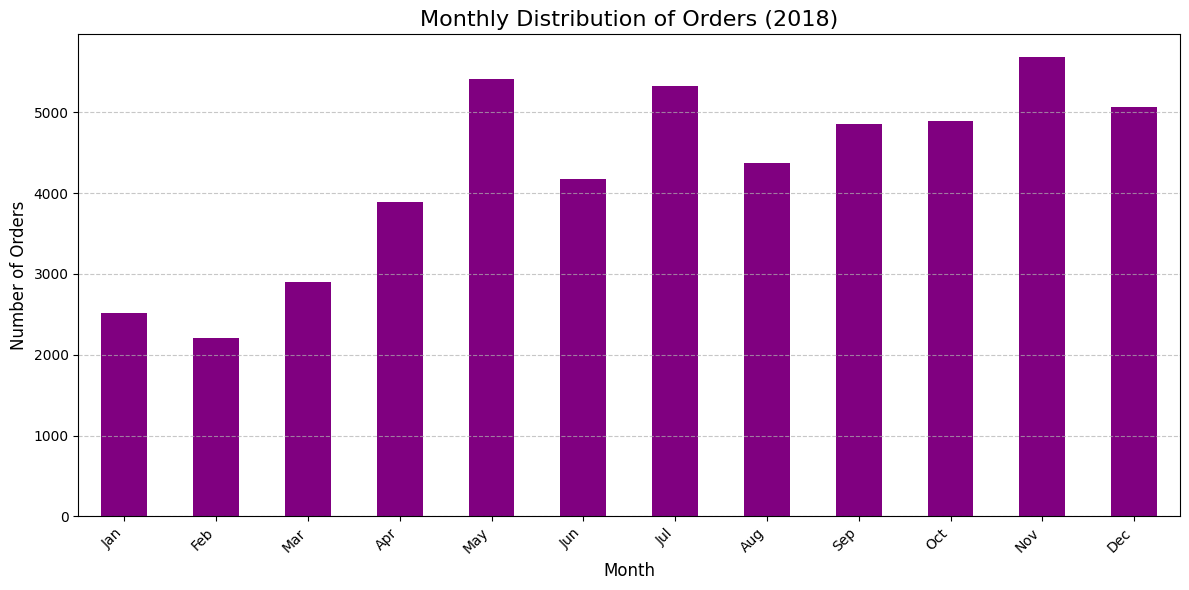

In [ ]:
# Date processing
df_upd['Order_Date'] = pd.to_datetime(df_upd['Order_Date'], errors='coerce')
df_upd.dropna(subset=['Order_Date'], inplace=True)
df_upd['Order_Month'] = df_upd['Order_Date'].dt.month

# Monthly distribution calculation
# Creating a Seriece with month names for better readability of the graph
month_names = {i: pd.to_datetime(i, format='%m').strftime('%b') for i in range(1, 13)}
monthly_distribution = df_upd['Order_Month'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(12, 6))
monthly_distribution.plot(kind='bar', color='purple')

# Descriding values in visualisation
plt.title('Monthly Distribution of Orders (2018)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(ticks=range(len(monthly_distribution)),
           labels=[month_names[i] for i in monthly_distribution.index],
           rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
#RFM analysis  - Recency , Frequency, Monetisation

In [ ]:
#Recency measure, to measure Recency, it is needed to define the maximun date in this e-commerce data set
#the latest date is this analysis would be recognised as NOW, it is univeral variable that is why any grouping
NOW = df_upd['Order_Date'].max()
print(NOW)
type(NOW)

2018-12-30 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#Grouping for each customer level
Last_Order_Date = df_upd.groupby('Customer_Id')['Order_Date'].max()
print(Last_Order_Date)

Customer_Id
10000   2018-12-06
10002   2018-08-20
10004   2018-08-08
10006   2018-08-08
10013   2018-05-17
           ...    
99990   2018-12-22
99991   2018-11-06
99992   2018-05-30
99993   2018-07-09
99999   2018-04-26
Name: Order_Date, Length: 38990, dtype: datetime64[ns]


In [ ]:
#Merging Last_Purchase_Date to the new data set to have all values in one data table
df_upd_recency = df_upd.merge(Last_Order_Date, on='Customer_Id', how='left')
print(df_upd_recency)

      Order_Date_x      Time  Aging  Customer_Id  Gender Device_Type  \
0       2018-01-02  10:56:33    8.0        37077  Female         Web   
1       2018-07-24  20:41:37    2.0        59173  Female         Web   
2       2018-11-08  08:38:49    8.0        41066  Female         Web   
3       2018-04-18  19:28:06    7.0        50741  Female         Web   
4       2018-08-13  21:18:39    9.0        53639  Female         Web   
...            ...       ...    ...          ...     ...         ...   
51277   2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51278   2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51279   2018-02-28  10:25:07    6.0        63313    Male         Web   
51280   2018-02-28  10:50:08    7.0        86485    Male         Web   
51281   2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Accessories  Car Media Pla

In [ ]:
#Setting correct user friendly renaming
df_upd_recency = df_upd_recency.rename(columns={'Order_Date_x': 'Order_Date', 'Order_Date_y': 'Last_Order_Date_Per_Customer'})

In [ ]:
display(df_upd_recency.head())

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Month,Last_Order_Date_Per_Customer
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,1,2018-01-02
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,7,2018-07-24
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,11,2018-11-08
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,4,2018-04-18
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,8,2018-08-13


In [ ]:
#Checking on one value to be sure how merging works
df_upd_recency[(df_upd_recency['Customer_Id'] == 26058)]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Month,Last_Order_Date_Per_Customer
24088,2018-05-22,23:08:55,10.0,26058,Male,Mobile,Member,Fashion,Shirts,196.0,1.0,0.5,106.2,10.6,Medium,credit_card,5,2018-05-22


In [ ]:
#Adding universal value NOW to column
df_upd_recency['NOW'] = '2018-12-30'
print(df_upd_recency)

      Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0     2018-01-02  10:56:33    8.0        37077  Female         Web   
1     2018-07-24  20:41:37    2.0        59173  Female         Web   
2     2018-11-08  08:38:49    8.0        41066  Female         Web   
3     2018-04-18  19:28:06    7.0        50741  Female         Web   
4     2018-08-13  21:18:39    9.0        53639  Female         Web   
...          ...       ...    ...          ...     ...         ...   
51277 2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51278 2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51279 2018-02-28  10:25:07    6.0        63313    Male         Web   
51280 2018-02-28  10:50:08    7.0        86485    Male         Web   
51281 2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Accessories  Car Media Players  140.0   
1        

In [ ]:
#Seting datetime format for all date columns
df_upd_recency['Order_Date'] = pd.to_datetime(df_upd_recency['Order_Date'])
df_upd_recency['Last_Order_Date_Per_Customer'] = pd.to_datetime(df_upd_recency['Last_Order_Date_Per_Customer'])
df_upd_recency['NOW'] = pd.to_datetime(df_upd_recency['NOW'])

In [ ]:
#Recency - how many days have passed since the customer's last purchase date to NOW, working with recoded data
df_upd_recency['Recency'] = df_upd_recency['NOW'] - df_upd_recency['Last_Order_Date_Per_Customer']
print(df_upd_recency)

      Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0     2018-01-02  10:56:33    8.0        37077  Female         Web   
1     2018-07-24  20:41:37    2.0        59173  Female         Web   
2     2018-11-08  08:38:49    8.0        41066  Female         Web   
3     2018-04-18  19:28:06    7.0        50741  Female         Web   
4     2018-08-13  21:18:39    9.0        53639  Female         Web   
...          ...       ...    ...          ...     ...         ...   
51277 2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51278 2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51279 2018-02-28  10:25:07    6.0        63313    Male         Web   
51280 2018-02-28  10:50:08    7.0        86485    Male         Web   
51281 2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Accessories  Car Media Players  140.0   
1        

In [ ]:
#Operation for defining the date + time of the transaction, as on one day could be done more than 1 transaction
df_upd_recency['Order_DateTime'] = df['Order_Date'].astype(str) + ' ' + df['Time'].astype(str)
print(df_upd_recency)

      Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0     2018-01-02  10:56:33    8.0        37077  Female         Web   
1     2018-07-24  20:41:37    2.0        59173  Female         Web   
2     2018-11-08  08:38:49    8.0        41066  Female         Web   
3     2018-04-18  19:28:06    7.0        50741  Female         Web   
4     2018-08-13  21:18:39    9.0        53639  Female         Web   
...          ...       ...    ...          ...     ...         ...   
51277 2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51278 2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51279 2018-02-28  10:25:07    6.0        63313    Male         Web   
51280 2018-02-28  10:50:08    7.0        86485    Male         Web   
51281 2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  ...  \
0                  Member  Auto & Accessories  Car Media Players  140.0  ...   

In [ ]:
#Working with the Frequency dimension
Frequency = df_upd_recency.groupby('Customer_Id')['Order_DateTime'].nunique()
print(Frequency)

Customer_Id
10000    2
10002    1
10004    1
10006    2
10013    1
        ..
99990    1
99991    1
99992    1
99993    1
99999    1
Name: Order_DateTime, Length: 38990, dtype: int64


In [ ]:
Monetisation = df_upd_recency.groupby('Customer_Id')['Profit'].sum()
print(Monetisation)

Customer_Id
10000    167.1
10002     66.0
10004      1.6
10006    269.0
10013     74.2
         ...  
99990     26.0
99991      4.2
99992     37.8
99993     34.7
99999     62.0
Name: Profit, Length: 38990, dtype: float64


profit is a monetaty measure
measure with frequency
and start Kmeans clustering



In [ ]:
#Performing INNER JOIN with Frequence and Monetisation to get the value FM_df
FM_df = pd.merge(Frequency, Monetisation, on='Customer_Id', how='inner')
print(FM_df)

             Order_DateTime  Profit
Customer_Id                        
10000                     2   167.1
10002                     1    66.0
10004                     1     1.6
10006                     2   269.0
10013                     1    74.2
...                     ...     ...
99990                     1    26.0
99991                     1     4.2
99992                     1    37.8
99993                     1    34.7
99999                     1    62.0

[38990 rows x 2 columns]


As you can see, `Old_Column_A` is now `New_Column_A` and `Old_Column_B` is now `New_Column_B`.

In [ ]:
RFM_df = pd.merge(df_upd_recency, FM_df, on='Customer_Id', how='inner')
# Convert Recency from Timedelta to days (integer)
RFM_df['Recency'] = RFM_df['Recency'].dt.days
# Rename Frequency and Monetary columns for clarity
RFM_df = RFM_df.rename(columns={'Order_DateTime_y': 'Frequency', 'Profit_y': 'Monetary'})
print(RFM_df.head())

  Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0 2018-01-02  10:56:33    8.0        37077  Female         Web   
1 2018-07-24  20:41:37    2.0        59173  Female         Web   
2 2018-11-08  08:38:49    8.0        41066  Female         Web   
3 2018-04-18  19:28:06    7.0        50741  Female         Web   
4 2018-08-13  21:18:39    9.0        53639  Female         Web   

  Customer_Login_type    Product_Category            Product  Sales  ...  \
0              Member  Auto & Accessories  Car Media Players  140.0  ...   
1              Member  Auto & Accessories       Car Speakers  211.0  ...   
2              Member  Auto & Accessories    Car Body Covers  117.0  ...   
3              Member  Auto & Accessories    Car & Bike Care  118.0  ...   
4              Member  Auto & Accessories               Tyre  250.0  ...   

   Shipping_Cost  Order_Priority  Payment_method  Order_Month  \
0            4.6          Medium     credit_card            1   
1           11.2

In [ ]:
display(RFM_df.head())

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Shipping_Cost,Order_Priority,Payment_method,Order_Month,Last_Order_Date_Per_Customer,NOW,Recency,Order_DateTime_x,Frequency,Monetary
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,4.6,Medium,credit_card,1,2018-01-02,2018-12-30,362,2018-01-02 10:56:33,1,46.0
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,11.2,Medium,credit_card,7,2018-07-24,2018-12-30,159,2018-07-24 20:41:37,1,112.0
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,3.1,Critical,credit_card,11,2018-11-08,2018-12-30,52,2018-11-08 08:38:49,1,31.2
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,2.6,High,credit_card,4,2018-04-18,2018-12-30,256,2018-04-18 19:28:06,1,26.2
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,16.0,Critical,credit_card,8,2018-08-13,2018-12-30,139,2018-08-13 21:18:39,1,160.0


In [ ]:
RFM_df.dtypes

,0
Order_Date,datetime64[ns]
Time,object
Aging,float64
Customer_Id,int64
Gender,object
Device_Type,object
Customer_Login_type,object
Product_Category,object
Product,object
Sales,float64


/tmp/ipython-input-1340268246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Recency'], ax=axes[0])
/tmp/ipython-input-1340268246.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Frequency'], ax=axes[1])
/tmp/ipython-input-1340268246.py:7: UserWarning: 

`distplot` is a d

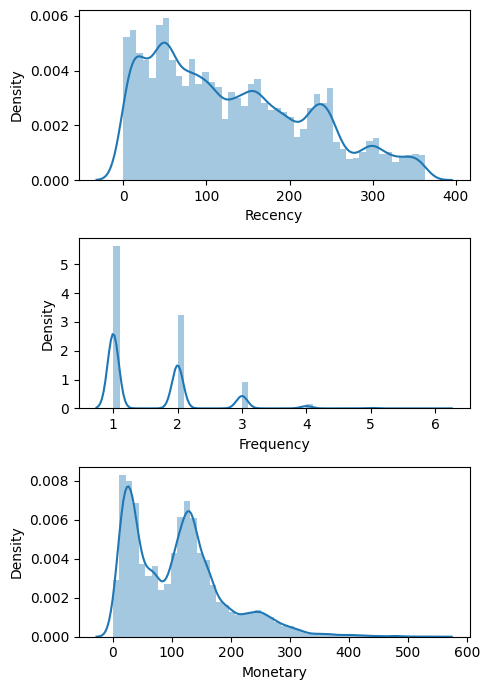

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=3, figsize=(5, 7))

# Plot the distributions
sns.distplot(RFM_df['Recency'], ax=axes[0])
sns.distplot(RFM_df['Frequency'], ax=axes[1])
sns.distplot(RFM_df['Monetary'], ax=axes[2])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Apply the log(x+1) transformation to specific columns
RFM_df['Recency_log'] = np.log1p(RFM_df['Recency'])
RFM_df['Frequency_log'] = np.log1p(RFM_df['Frequency'])
RFM_df['Monetary_log'] = np.log1p(RFM_df['Monetary'])

/tmp/ipython-input-2002240492.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Recency_log'], ax=axes[0])
/tmp/ipython-input-2002240492.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Frequency_log'], ax=axes[1])
/tmp/ipython-input-2002240492.py:7: UserWarning: 

`distplot

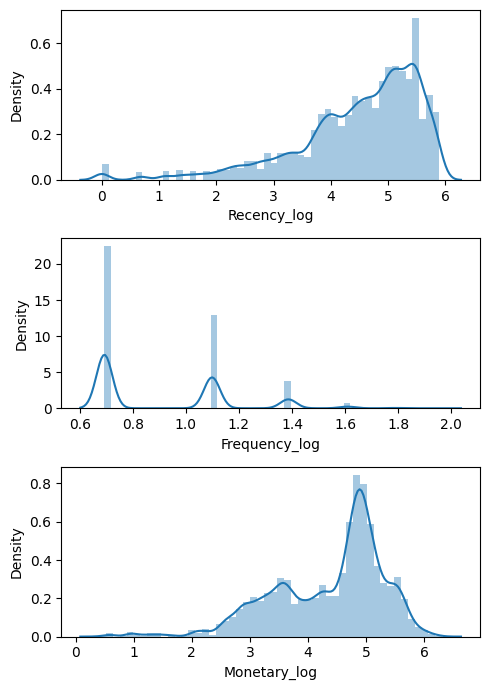

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=3, figsize=(5, 7))

# Plot the distributions
sns.distplot(RFM_df['Recency_log'], ax=axes[0])
sns.distplot(RFM_df['Frequency_log'], ax=axes[1])
sns.distplot(RFM_df['Monetary_log'], ax=axes[2])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
windsoriser = Winsorizer(capping_method='gaussian',
                         tail='both',
                          fold=2,
                          variables=['Recency_log', 'Frequency_log' , 'Monetary_log'])
windsoriser.fit(RFM_df)

Winsorizer(fold=2, tail='both',
           variables=['Recency_log', 'Frequency_log', 'Monetary_log'])

In [ ]:
RFM_df_transformed = windsoriser.transform(RFM_df)
RFM_df_transformed

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Order_Month,Last_Order_Date_Per_Customer,NOW,Recency,Order_DateTime_x,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,1,2018-01-02,2018-12-30,362,2018-01-02 10:56:33,1,46.0,5.894403,0.693147,3.850148
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,7,2018-07-24,2018-12-30,159,2018-07-24 20:41:37,1,112.0,5.075174,0.693147,4.727388
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,11,2018-11-08,2018-12-30,52,2018-11-08 08:38:49,1,31.2,3.970292,0.693147,3.471966
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,4,2018-04-18,2018-12-30,256,2018-04-18 19:28:06,1,26.2,5.549076,0.693147,3.303217
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,8,2018-08-13,2018-12-30,139,2018-08-13 21:18:39,1,160.0,4.941642,0.693147,5.081404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,...,2,2018-02-28,2018-12-30,305,2018-02-28 10:05:18,1,19.2,5.723585,0.693147,3.005683
51278,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,...,2,2018-11-13,2018-12-30,47,2018-02-28 15:15:11,2,142.9,3.871201,1.098612,4.969119
51279,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,...,2,2018-02-28,2018-12-30,305,2018-02-28 23:17:17,1,39.7,5.723585,0.693147,3.706228
51280,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,...,2,2018-02-28,2018-12-30,305,2018-02-28 21:33:07,1,131.7,5.723585,0.693147,4.888091


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the log-transformed columns for scaling
features_to_scale = RFM_df_transformed[['Recency_log', 'Frequency_log', 'Monetary_log']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(features_to_scale)

# Create new columns in RFM_df_transformed for the scaled features
RFM_df_transformed['Recency_log_scaled'] = scaled_features[:, 0]
RFM_df_transformed['Frequency_log_scaled'] = scaled_features[:, 1]
RFM_df_transformed['Monetary_log_scaled'] = scaled_features[:, 2]

# Print means and stds for the scaled features
print('Recency_log_scaled_mean', RFM_df_transformed['Recency_log_scaled'].mean())
print('Recency_log_scaled_std', RFM_df_transformed['Recency_log_scaled'].std())
print('Frequency_log_scaled_mean', RFM_df_transformed['Frequency_log_scaled'].mean())
print('Frequency_log_scaled_std', RFM_df_transformed['Frequency_log_scaled'].std())
print('Monetary_log_scaled_mean', RFM_df_transformed['Monetary_log_scaled'].mean())
print('Monetary_log_scaled_std', RFM_df_transformed['Monetary_log_scaled'].std())
RFM_df_transformed.head()

Recency_log_scaled_mean -9.98157222498296e-16
Recency_log_scaled_std 1.0000097501523446
Frequency_log_scaled_mean -2.710154812890987e-16
Frequency_log_scaled_std 1.0000097501522
Monetary_log_scaled_mean 2.5494298853371247e-17
Monetary_log_scaled_std 1.000009750152326


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Recency,Order_DateTime_x,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Recency_log_scaled,Frequency_log_scaled,Monetary_log_scaled
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,362,2018-01-02 10:56:33,1,46.0,5.894403,0.693147,3.850148,1.410456,-0.830345,-0.611746
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,159,2018-07-24 20:41:37,1,112.0,5.075174,0.693147,4.727388,0.565693,-0.830345,0.377141
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,52,2018-11-08 08:38:49,1,31.2,3.970292,0.693147,3.471966,-0.573626,-0.830345,-1.038059
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,256,2018-04-18 19:28:06,1,26.2,5.549076,0.693147,3.303217,1.054366,-0.830345,-1.228285
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,139,2018-08-13 21:18:39,1,160.0,4.941642,0.693147,5.081404,0.428000,-0.830345,0.776214


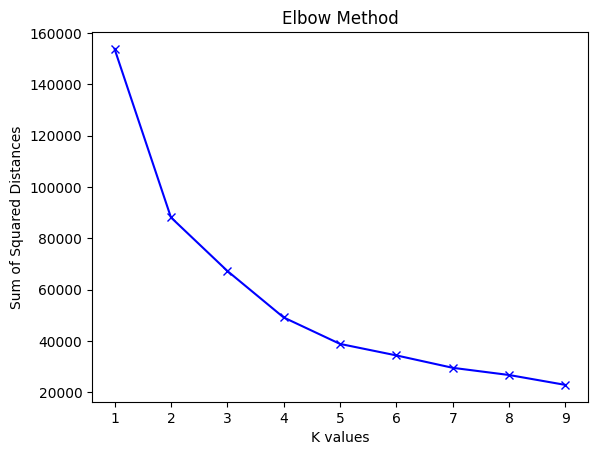

In [ ]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(RFM_df_transformed[['Recency_log_scaled', 'Frequency_log_scaled', 'Monetary_log_scaled']])
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

After taking a look on the elbow method for this RFM segmentation could be definied 3 or 4 clusters to segment

In [ ]:
RFM_kmeans = KMeans(n_clusters=3)
RFM_kmeans.fit(RFM_df_transformed[['Recency_log_scaled', 'Frequency_log_scaled', 'Monetary_log_scaled']])

labels = RFM_kmeans.predict(RFM_df_transformed[['Recency_log_scaled', 'Frequency_log_scaled', 'Monetary_log_scaled']])

RFM_df_new = RFM_df_transformed.copy()
RFM_df_new['Cluster'] = labels

print(RFM_df_new)

      Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0     2018-01-02  10:56:33    8.0        37077  Female         Web   
1     2018-07-24  20:41:37    2.0        59173  Female         Web   
2     2018-11-08  08:38:49    8.0        41066  Female         Web   
3     2018-04-18  19:28:06    7.0        50741  Female         Web   
4     2018-08-13  21:18:39    9.0        53639  Female         Web   
...          ...       ...    ...          ...     ...         ...   
51277 2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51278 2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51279 2018-02-28  10:25:07    6.0        63313    Male         Web   
51280 2018-02-28  10:50:08    7.0        86485    Male         Web   
51281 2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  ...  \
0                  Member  Auto & Accessories  Car Media Players  140.0  ...   

In [ ]:
#Basic statsictics for formulated Clusters
customers_per_cluster = RFM_df_new.groupby('Cluster')['Customer_Id'].nunique().reset_index()
customers_per_cluster.rename(columns={'Customer_Id': 'Number_of_Customers'}, inplace=True)
display(customers_per_cluster)

,Cluster,Number_of_Customers
0,0,14182
1,1,9692
2,2,15116


In [ ]:
#Visualisation of clusters according to Recency, Frequency and Monetisation
sns.pairplot(RFM_df_new, vars=['Recency_log_scaled', 'Frequency_log_scaled', 'Monetary_log_scaled'], hue='Cluster', palette='viridis')
plt.suptitle('RFM Clusters (Scaled Features)', y=1.02) # Adjust suptitle position
plt.show()